In [1]:
from os.path import join
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth
from collections import Counter

In [2]:
from collections import Counter
from os.path import join
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.base import clone
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

sns.set()

In [3]:
data = pd.read_csv("data_full.csv")

In [4]:
data.columns

Index(['ID', 'Age', 'Income', 'DaysWithoutFrequency', 'LifetimeValue',
       'UseByTime', 'AthleticsActivities', 'WaterActivities',
       'FitnessActivities', 'TeamActivities', 'RacketActivities',
       'CombatActivities', 'SpecialActivities', 'OtherActivities',
       'NumberOfFrequencies', 'AttendedClasses', 'AllowedWeeklyVisitsBySLA',
       'AllowedNumberOfVisitsBySLA', 'RealNumberOfVisits', 'NumberOfRenewals',
       'HasReferences', 'NumberOfReferences', 'Dropout', 'Active_Period',
       'Contract_Duration', 'PercentageOfVisits', 'TotalNumberOfActivities',
       'MonthlyValue', 'PercentageOfClasses', 'Freq_Visits_Day',
       'Freq_Classes_Contract', 'Visits_ActivePeriod', 'Gender_Female'],
      dtype='object')

In [5]:
metric_features = ['Age','Contract_Duration', 'PercentageOfVisits', 'PercentageOfClasses',
       'Freq_Visits_Day', 'Visits_ActivePeriod', 'MonthlyValue','Active_Period']

non_metric_features = data.columns.drop(metric_features).to_list()

In [6]:
activities = ['AthleticsActivities', 'WaterActivities','FitnessActivities','TeamActivities','RacketActivities','CombatActivities','SpecialActivities','OtherActivities']
compare = ['Dropout', 'Gender_Female','UseByTime']

In [7]:
demographic_features = ['Age','Contract_Duration', 'MonthlyValue', 'Active_Period']


frequency_features = ['PercentageOfVisits', 'PercentageOfClasses',
       'Freq_Visits_Day', 'Visits_ActivePeriod'
 
]

df_dem = data[demographic_features].copy()
df_freq = data[frequency_features].copy()

In [8]:
#demographic_features = ['Age','Contract_Duration', 'Active_Period']


frequency_features = ['PercentageOfVisits', 'PercentageOfClasses',
       'Freq_Visits_Day', 'Freq_Classes_Contract', 'Visits_ActivePeriod'
 
]

df_dem = data[demographic_features].copy()
df_freq = data[frequency_features].copy()

## Removing Outliers using DBSCAN:

 Since we know that our data is highly skewed and contains outliers not removed, we apply a DBSCAN to try to detect the remaining outliers.

 We need to define the parameters of our model ( **ε** and **min_samples**):
 
 -  **min_samples**  is, on a first approach, considered **2 x dim** where dim is the dimension of our metric features;
 - **ε** can be found by ploting a **k-distance graph** (distance to the kth (k = min_samples - 1) nearest neighbor ordered from the largest to the smallest value). The **elbow** of this graph is considered a good value for ε.

In [9]:
##graph

   Looking at the k-distance graph, we select the value **ε= 2.1** as the ideal value (elbow value).

In [10]:
dbscan = DBSCAN(eps=2.25, min_samples = 2 * len(metric_features), n_jobs = -1)
dbscan_labels = dbscan.fit_predict(data[metric_features])

Counter(dbscan_labels)

Counter({0: 14687, -1: 86})

In [11]:
data_c = pd.concat([data, pd.Series(dbscan_labels, name = 'outlier_labels', index = data.index)], axis =1)

We remove the outlier values calculated with DBSCAN and store them for possible future analysis:

In [12]:
data_dbscan_out = data[dbscan_labels == -1]
data = data[dbscan_labels != -1]

In [13]:
data.shape

(14687, 33)

In [14]:
df_dem = data[demographic_features].copy()
df_freq = data[frequency_features].copy()

--------

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN,AgglomerativeClustering
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import numpy as np

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

from collections import Counter
from os.path import join
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.base import clone
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

sns.set()

import warnings
warnings.filterwarnings("ignore")

/var/folders/x6/c7bgz3zn0hg_kdmljrfw7k_m0000gn/T/ipykernel_16775/3366181502.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [16]:
metric_test = ['Age','Contract_Duration','PercentageOfVisits', 'Freq_Visits_Day','Visits_ActivePeriod','PercentageOfClasses']

In [17]:
pca = PCA(n_components=3)
pca.fit(df_dem)
PCA_ds = pd.DataFrame(pca.transform(df_dem), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,14687.0,2.322193e-17,1.170806,-2.868554,-0.590355,-0.231241,0.427132,5.382267
col2,14687.0,3.967080e-17,1.053845,-3.345753,-0.575579,0.054669,0.649669,4.491999
col3,14687.0,-3.289774e-17,0.728016,-1.505617,-0.512891,-0.129041,0.368051,4.545626


In [18]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=3)

#fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

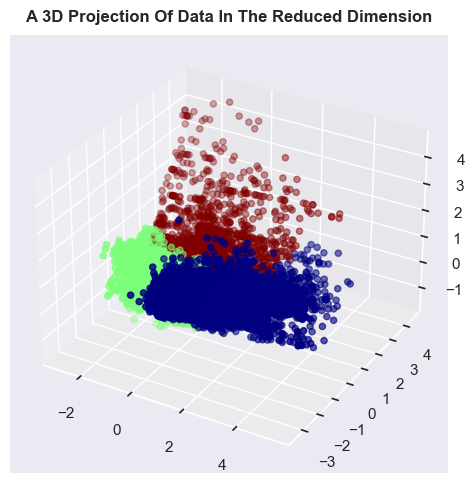

In [19]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

#To plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c=PCA_ds['Clusters'], marker="o" ,cmap='jet')
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [20]:
ag = AgglomerativeClustering(n_clusters=3,linkage='ward', metric='euclidean')
ag_labels = ag.fit_predict(df_dem)


ag_n_clusters = len(np.unique(ag_labels))
print("Number of estimated clusters : %d" % ag_n_clusters)

Counter(ag_labels)

Number of estimated clusters : 3


Counter({1: 7753, 0: 4263, 2: 2671})

In [21]:
kmeans = KMeans(n_clusters =4 , init = 'k-means++', random_state = 88)
data["Cluster"] = kmeans.fit_predict(df_dem)
data["Cluster"] = data["Cluster"].astype("category")
km_labels= kmeans.fit_predict(df_dem)
Counter(km_labels)

Counter({1: 7090, 2: 3139, 3: 2322, 0: 2136})

-------

## Gaussian Mixture Model:

In [22]:
gmm = GaussianMixture(n_components=5, covariance_type='diag', n_init=10, init_params='k-means++', random_state=1, max_iter=3000, reg_covar=10**-3, tol = 10**-5)
freq_labels = gmm.fit_predict(df_freq)
labels_proba = gmm.predict_proba(df_freq)
freq_labels

array([1, 0, 4, ..., 3, 1, 3])

In [23]:
c= Counter(freq_labels)
c

Counter({4: 4624, 2: 3502, 1: 2445, 3: 2314, 0: 1802})

In [24]:
counter = []
for n in range(0,5):
    counter.append(round(c[n]/df_freq.shape[0],4))
counter

[0.1227, 0.1665, 0.2384, 0.1576, 0.3148]

In [25]:
freq = pd.concat([data, pd.Series(freq_labels, index=data.index, name="freq_labels")], axis=1)

In [26]:
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(freq[frequency_features])  # get total sum of squares
ssw_labels = freq[frequency_features + ["freq_labels"]].groupby(by='freq_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.6046


In [27]:
def get_ss_variables(df):
    """Get the SS for each variable
    """
    ss_vars = df.var() * (df.count() - 1)
    return ss_vars

def r2_variables(df, labels):
    """Get the R² for each variable
    """
    sst_vars = get_ss_variables(df)
    ssw_vars = np.sum(df.groupby(labels).apply(get_ss_variables))
    return 1 - ssw_vars/sst_vars

In [28]:
r2_variables(freq[frequency_features + ["freq_labels"]], "freq_labels").drop("freq_labels")

PercentageOfVisits       0.599152
PercentageOfClasses      0.840498
Freq_Visits_Day          0.373884
Freq_Classes_Contract    0.608565
Visits_ActivePeriod      0.558879
dtype: float64

Same thing now for demographic:

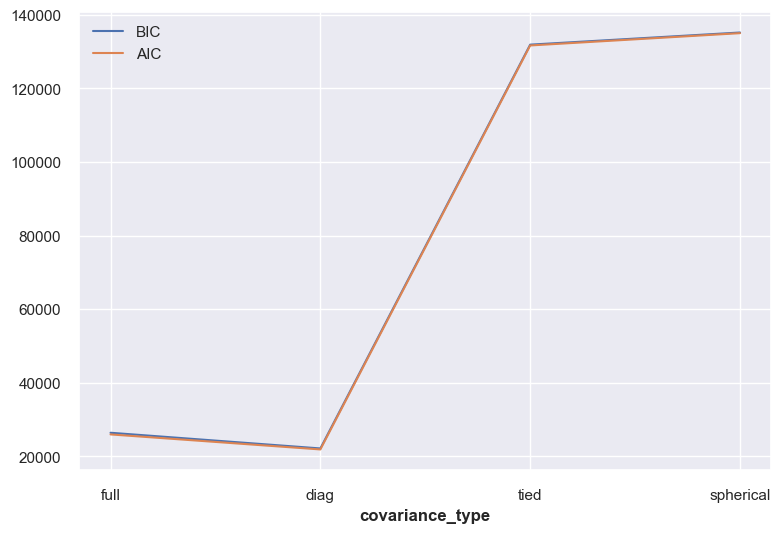

In [29]:
# Selecting covariance type based on AIC and BIC
cov_type = ['full','diag', 'tied', 'spherical']
models = [GaussianMixture(n_components=4, covariance_type=t, n_init=10, random_state=1).fit(df_dem)
          for t in cov_type]

# TO-DO: compute the aic and bic values for each cluster solution. Use the appropriate GMM methods.
bic_values = [gmm.bic(df_dem) for gmm in models]
aic_values = [gmm.aic(df_dem) for gmm in models]
plt.plot(cov_type, bic_values, label='BIC')
plt.plot(cov_type, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('covariance_type')
plt.xticks(cov_type)
plt.show()

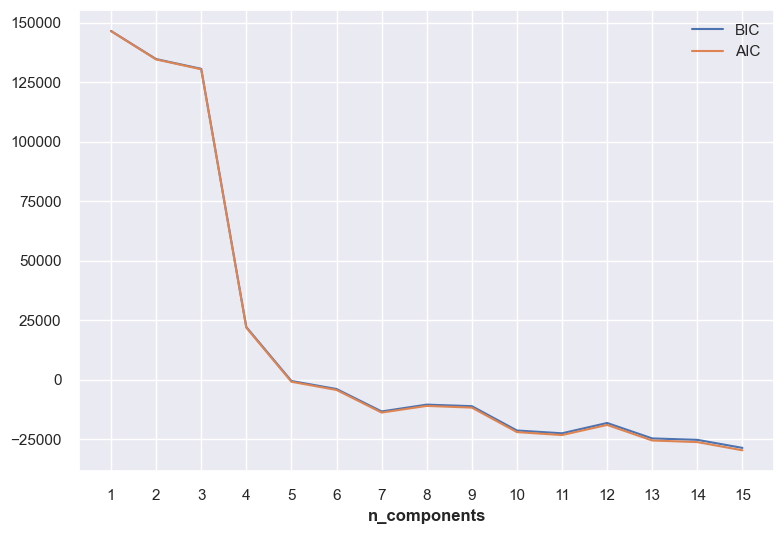

In [30]:
# Selecting number of components based on AIC and BIC
n_components = np.arange(1, 16)
models = [GaussianMixture(n, covariance_type='diag', n_init=10, random_state=1).fit(df_dem)
          for n in n_components]

# TO-DO: compute the aic and bic values for each cluster solution. Use the appropriate GMM methods.
bic_values = [gmm.bic(df_dem) for gmm in models]
aic_values = [gmm.aic(df_dem) for gmm in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

In [31]:
gmm = GaussianMixture(n_components=5, covariance_type='diag', n_init=10, init_params='k-means++', random_state=1, max_iter=3000, tol = 10**-4, reg_covar=10**-2)
dem_labels = gmm.fit_predict(df_dem)
labels_proba = gmm.predict_proba(df_dem)
dem_labels

array([0, 4, 0, ..., 0, 2, 2])

In [32]:
c= Counter(dem_labels)
c

Counter({4: 4798, 2: 3338, 0: 3005, 1: 2873, 3: 673})

In [33]:
counter = []
for n in range(0,5):
    counter.append(round(c[n]/df_dem.shape[0],4))
counter

[0.2046, 0.1956, 0.2273, 0.0458, 0.3267]

In [34]:
dem = pd.concat([data, pd.Series(dem_labels, index=data.index, name="dem_labels")], axis=1)

In [35]:
sst = get_ss(dem[demographic_features])  # get total sum of squares
ssw_labels = dem[demographic_features+ ["dem_labels"]].groupby(by='dem_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.3276


In [36]:
r2_variables(dem[demographic_features + ["dem_labels"]], "dem_labels").drop("dem_labels")

Age                  0.024864
Contract_Duration    0.567716
MonthlyValue         0.377570
Active_Period        0.925664
dtype: float64

## Merging Prespectives:

In [37]:
data['freq_labels'] = freq_labels
data['dem_labels'] = dem_labels

In [38]:
pd.crosstab(data['freq_labels'],
            data['dem_labels'])

dem_labels,0,1,2,3,4
freq_labels,,,,,
0,207,121,485,187,802
1,469,112,1029,126,709
2,622,695,495,152,1538
3,602,615,576,66,455
4,1105,1330,753,142,1294


## Manual merging: Merge lowest frequency clusters into closest clusters:

In [39]:
# Centroids of clusters
df_centroids = data.groupby(['dem_labels', 'freq_labels'])\
    [metric_features].mean()


# Clusters with low frequency to be merged:
# (dem_labels, freq_labels)
to_merge = [(0,0),(1,0),(3,0),(1,1),(3,1),(3,2),(3,3),(3,4)]


# Computing the euclidean distance matrix between the centroids
euclidean = pairwise_distances(df_centroids)
df_dists = pd.DataFrame(
    euclidean, columns=df_centroids.index, index=df_centroids.index
)

# Merging each low frequency clustering (source) to the closest cluster (target)
source_target = {}
for clus in to_merge:
    if clus not in source_target.values():
        source_target[clus] = df_dists.loc[clus].sort_values().index[1]

source_target

{(0, 0): (1, 0),
 (3, 0): (2, 0),
 (1, 1): (4, 1),
 (3, 1): (3, 0),
 (3, 2): (3, 4),
 (3, 3): (2, 3)}

In [40]:
df_ = data.copy()

# Changing the behavior_labels and product_labels based on source_target
for source, target in source_target.items():
    mask = (df_['dem_labels']==source[0]) & (df_['freq_labels']==source[1])
    df_.loc[mask, 'dem_labels'] = target[0]
    df_.loc[mask, 'freq_labels'] = target[1]

# New contigency table

pd.crosstab(df_['dem_labels'],
            df_['freq_labels'])

freq_labels,0,1,2,3,4
dem_labels,,,,,
0,0,469,622,602,1105
1,328,0,695,615,1330
2,672,1029,495,642,753
3,126,0,0,0,294
4,802,821,1538,455,1294


## Merging using Hierarchical clustering:

In [41]:
# Centroids of the concatenated cluster labels
df_centroids = data.groupby(['dem_labels', 'freq_labels'])\
    [metric_features].mean()
df_centroids

Age  Contract_Duration  PercentageOfVisits  \
dem_labels freq_labels                                                    
0          0           -0.085749          -0.326297           -0.243237   
           1           -0.339197          -0.397776            1.244350   
           2            0.583467          -0.409472           -0.401608   
           3            0.553571          -0.464024            1.137126   
           4            0.373756          -0.463470            0.053303   
1          0           -0.117769           0.097645           -0.363636   
           1           -0.075893           0.089612            0.962054   
           2           -0.086091          -0.020098           -0.417626   
           3           -0.039973           0.029766            1.133171   
           4           -0.072118           0.000172            0.096429   
2          0           -0.153093           1.147338           -0.348660   
           1           -0.383301           1.409663            1.246550   
           2            1.150505           1.170301           -0.446364   
           3            1.311343           1.373629            1.150347   
           4            1.027778           1.296864            0.036919   
3          0           -0.182264           1.760237           -0.278877   
           1           -0.205688           2.094858            0.978175   
           2            0.646930           1.742955           -0.410855   
           3            0.743687           2.153279            1.325758   
           4            0.744131           2.076950            0.100704   
4          0           -0.226205           0.210202           -0.289713   
           1            0.027504           0.199570            1.212623   
           2            0.403500          -0.043664           -0.410533   
           3            0.504579           0.005951            1.155495   
           4            0.339580          -0.005083            0.051546   

                        PercentageOfClasses  Freq_Visits_Day  \
dem_labels freq_labels                                         
0          0                       2.031662        -0.370583   
           1                       1.779279         0.437514   
           2                       0.000000        -0.315403   
           3                       0.000000         2.091603   
           4                       0.000000         0.365659   
1          0                       1.921447        -0.433654   
           1                       1.298742         0.331058   
           2                       0.000000        -0.330520   
           3                       0.000067         0.689625   
           4                       0.000190        -0.019678   
2          0                       2.026845        -0.327257   
           1                       1.834361         0.265759   
           2                       0.000655        -0.296668   
           3                       0.000963         1.060275   
           4                       0.001733         0.071535   
3          0                       1.953763        -0.378573   
           1                       1.913293         0.230679   
           2                       0.001025        -0.340758   
           3                       0.000244         1.207528   
           4                       0.000982         0.150057   
4          0                       2.032574        -0.316828   
           1                       1.860818         0.468792   
           2                       0.000017        -0.197323   
           3                       0.000155         1.823003   
           4                       0.000068         0.536747   

                        Visits_ActivePeriod  MonthlyValue  Active_Period  
dem_labels freq_labels                                                    
0          0                      -0.426413      0.900864      -0.007418  
           1                       0.635871      

In [42]:
# Using Hierarchical clustering to merge the concatenated cluster centroids
linkage = 'ward'
hclust = AgglomerativeClustering(
    linkage=linkage, 
    metric='euclidean', 
    distance_threshold=0, 
    n_clusters=None
)
hclust_labels = hclust.fit_predict(df_centroids)

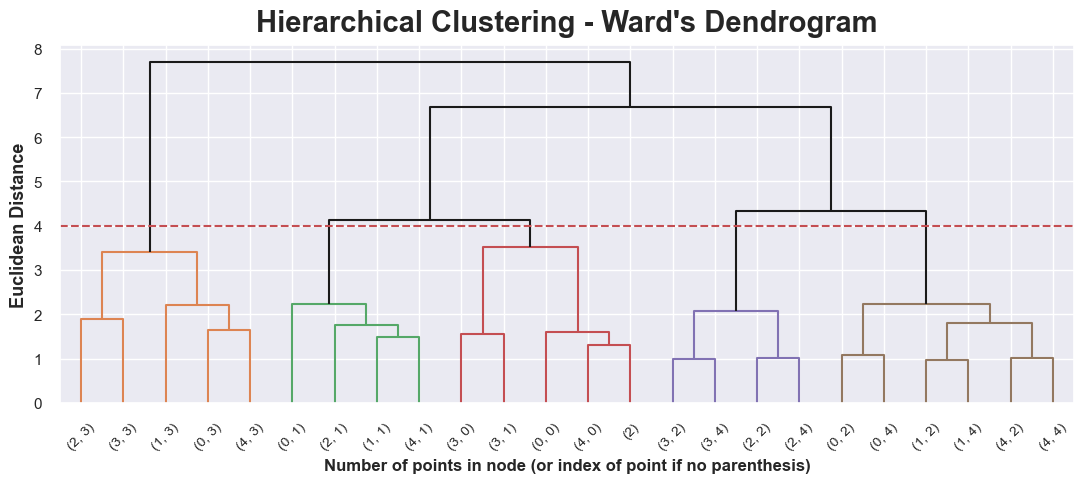

In [43]:
# Adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 4
dendrogram(linkage_matrix, 
           truncate_mode='level', 
           labels=df_centroids.index, p=5, 
           color_threshold=y_threshold, 
           above_threshold_color='k')

plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'Euclidean Distance', fontsize=13)
plt.show()

In [44]:
# Re-running the Hierarchical clustering based on the correct number of clusters
hclust = AgglomerativeClustering(
    linkage='ward', 
    metric='euclidean', 
    n_clusters=5
)
hclust_labels = hclust.fit_predict(df_centroids)
df_centroids['hclust_labels'] = hclust_labels

df_centroids  # centroid's cluster labels

Age  Contract_Duration  PercentageOfVisits  \
dem_labels freq_labels                                                    
0          0           -0.085749          -0.326297           -0.243237   
           1           -0.339197          -0.397776            1.244350   
           2            0.583467          -0.409472           -0.401608   
           3            0.553571          -0.464024            1.137126   
           4            0.373756          -0.463470            0.053303   
1          0           -0.117769           0.097645           -0.363636   
           1           -0.075893           0.089612            0.962054   
           2           -0.086091          -0.020098           -0.417626   
           3           -0.039973           0.029766            1.133171   
           4           -0.072118           0.000172            0.096429   
2          0           -0.153093           1.147338           -0.348660   
           1           -0.383301           1.409663            1.246550   
           2            1.150505           1.170301           -0.446364   
           3            1.311343           1.373629            1.150347   
           4            1.027778           1.296864            0.036919   
3          0           -0.182264           1.760237           -0.278877   
           1           -0.205688           2.094858            0.978175   
           2            0.646930           1.742955           -0.410855   
           3            0.743687           2.153279            1.325758   
           4            0.744131           2.076950            0.100704   
4          0           -0.226205           0.210202           -0.289713   
           1            0.027504           0.199570            1.212623   
           2            0.403500          -0.043664           -0.410533   
           3            0.504579           0.005951            1.155495   
           4            0.339580          -0.005083            0.051546   

                        PercentageOfClasses  Freq_Visits_Day  \
dem_labels freq_labels                                         
0          0                       2.031662        -0.370583   
           1                       1.779279         0.437514   
           2                       0.000000        -0.315403   
           3                       0.000000         2.091603   
           4                       0.000000         0.365659   
1          0                       1.921447        -0.433654   
           1                       1.298742         0.331058   
           2                       0.000000        -0.330520   
           3                       0.000067         0.689625   
           4                       0.000190        -0.019678   
2          0                       2.026845        -0.327257   
           1                       1.834361         0.265759   
           2                       0.000655        -0.296668   
           3                       0.000963         1.060275   
           4                       0.001733         0.071535   
3          0                       1.953763        -0.378573   
           1                       1.913293         0.230679   
           2                       0.001025        -0.340758   
           3                       0.000244         1.207528   
           4                       0.000982         0.150057   
4          0                       2.032574        -0.316828   
           1                       1.860818         0.468792   
           2                       0.000017        -0.197323   
           3                       0.000155         1.823003   
           4                       0.000068         0.536747   

                        Visits_ActivePeriod  MonthlyValue  Active_Period  \
dem_labels freq_labels                                                     
0          0                      -0.426413      0.900864      -0.007418   
           1                       0.635871   

In [45]:
# Mapper between concatenated clusters and hierarchical clusters
cluster_mapper = df_centroids['hclust_labels'].to_dict()

df_ = data.copy()

# Mapping the hierarchical clusters on the centroids to the observations
df_['merged_labels'] = df_.apply(
    lambda row: cluster_mapper[
        (row['dem_labels'], row['freq_labels'])
    ], axis=1
)

# Merged cluster centroids
df_.groupby('merged_labels')[metric_features].mean()

,Age,Contract_Duration,PercentageOfVisits,PercentageOfClasses,Freq_Visits_Day,Visits_ActivePeriod,MonthlyValue,Active_Period
merged_labels,,,,,,,,
0,-0.180325,0.654787,-0.220280,2.008621,-0.302763,-0.468027,0.122006,0.631184
1,0.580236,0.291702,1.148358,0.000295,1.384246,1.816737,0.098679,0.225137
2,0.255189,-0.129754,-0.139368,0.000056,0.052105,-0.100808,0.070740,0.420993
3,1.003513,1.372045,-0.156485,0.001248,-0.080073,-0.065640,-0.498244,0.227687
4,-0.233937,0.610400,1.221992,1.805441,0.365723,0.562989,0.526494,0.301039


In [46]:
#Merge cluster contigency table
# Getting size of each final cluster
df_counts = df_.groupby('merged_labels')\
    .size()\
    .to_frame()

# Getting the product and behavior labels
df_counts = df_counts\
    .rename({v:k for k, v in cluster_mapper.items()})\
    .reset_index()

df_counts['dem_labels'] = df_counts['merged_labels'].apply(lambda x: x[0])
df_counts['freq_labels'] = df_counts['merged_labels'].apply(lambda x: x[1])

df_counts.pivot(values=0, index='dem_labels', columns='freq_labels')

freq_labels,0,1,3,4
dem_labels,,,,
3,NaN,NaN,NaN,1542.0
4,1928.0,2319.0,2314.0,6584.0


In [47]:
df = df_.copy()

-----

In [48]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    """
    Pass df with labels columns of one or multiple clustering labels. 
    Then specify this label columns to perform the cluster profile according to them.
    """
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
       
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight = 'heavy') 
        ax[0].legend(handles, cluster_labels) 
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
    
    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()

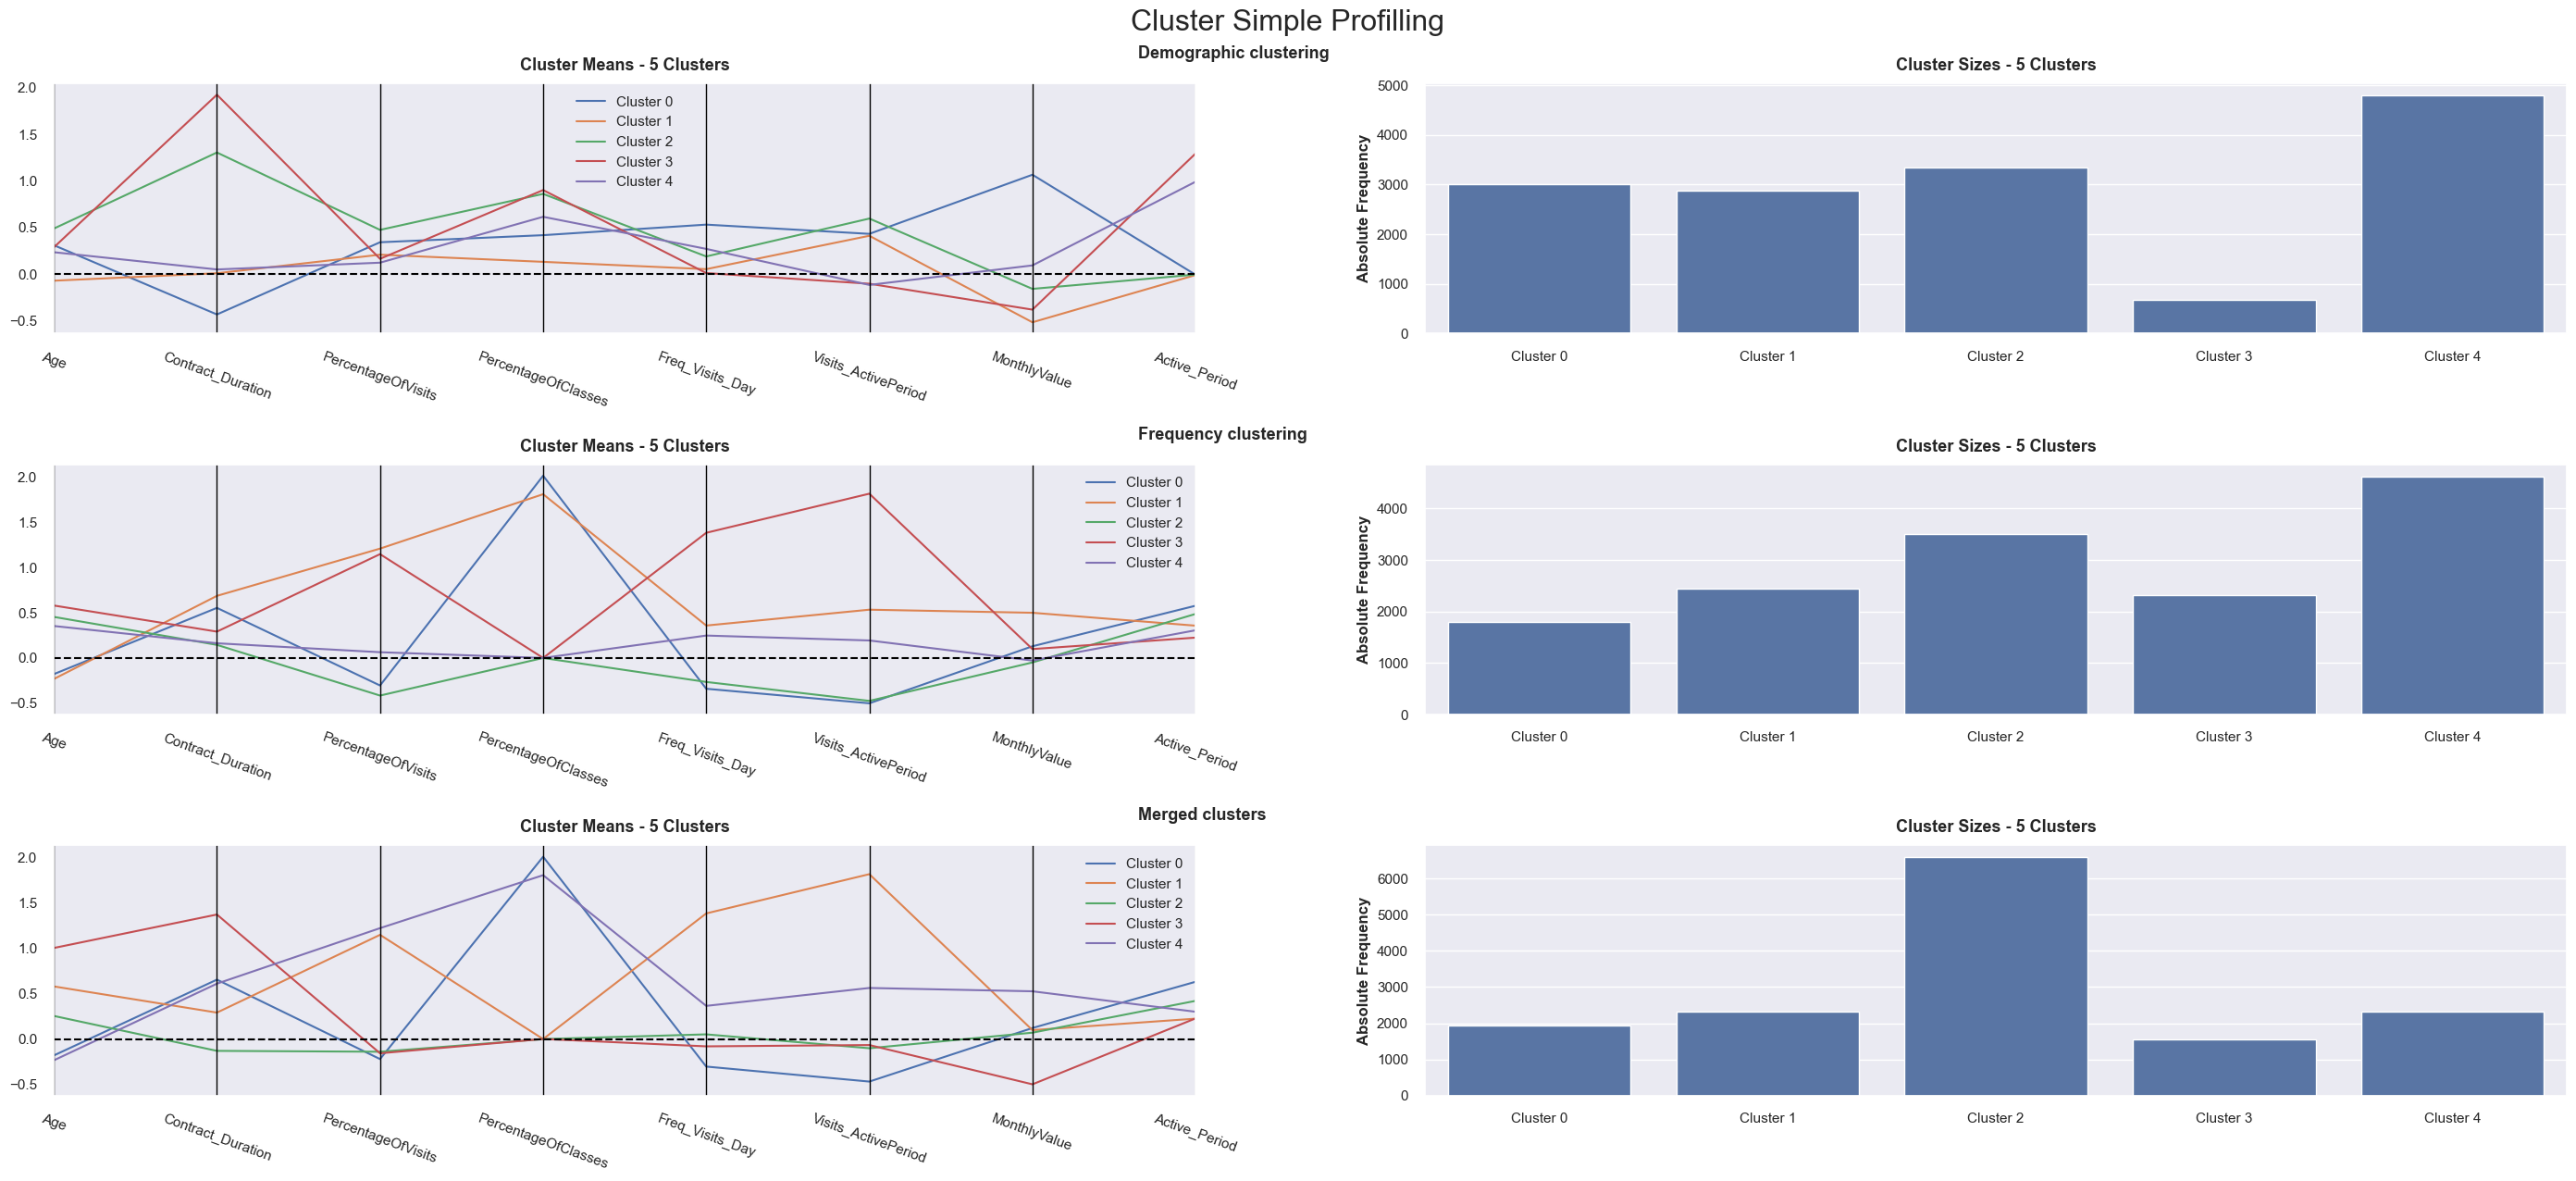

In [49]:
# Profilling each cluster (product, behavior, merged)
cluster_profiles(
    df = df[metric_features + ['dem_labels', 'freq_labels', 'merged_labels']], 
    label_columns = ['dem_labels', 'freq_labels', 'merged_labels'], 
    figsize = (28, 13), 
    compar_titles = ["Demographic clustering", "Frequency clustering", "Merged clusters"])

In [50]:
sst = get_ss(df[metric_features])  # get total sum of squares
ssw_labels = df[metric_features+ ["merged_labels"]].groupby(by='merged_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.3533


In [51]:
df_study= df[["merged_labels"] + metric_features].groupby(["merged_labels"]).sum()

In [52]:
df_study[metric_features].apply(lambda col: col/(col.sum())).style.format(precision=2).background_gradient(axis=0)

,Age,Contract_Duration,PercentageOfVisits,PercentageOfClasses,Freq_Visits_Day,Visits_ActivePeriod,MonthlyValue,Active_Period
merged_labels,,,,,,,,
0,-0.09,0.27,-0.11,0.48,-0.16,-0.23,0.17,0.22
1,0.36,0.15,0.68,0.00,0.87,1.09,0.17,0.09
2,0.46,-0.19,-0.23,0.00,0.09,-0.17,0.34,0.50
3,0.42,0.46,-0.06,0.00,-0.03,-0.03,-0.56,0.06
4,-0.15,0.31,0.73,0.52,0.23,0.34,0.88,0.13


In [53]:
df_study= df[["merged_labels"] + activities].groupby(["merged_labels"]).sum()

In [54]:
df_study[activities].apply(lambda col: col/(col.sum())).style.format(precision=2).background_gradient(axis=0)

,AthleticsActivities,WaterActivities,FitnessActivities,TeamActivities,RacketActivities,CombatActivities,SpecialActivities,OtherActivities
merged_labels,,,,,,,,
0,0.07,0.27,0.03,0.52,0.45,0.04,0.21,0.57
1,0.17,0.08,0.22,0.04,0.00,0.08,0.26,0.04
2,0.53,0.21,0.56,0.11,0.03,0.65,0.09,0.04
3,0.20,0.07,0.13,0.06,0.00,0.17,0.10,0.11
4,0.04,0.37,0.05,0.26,0.51,0.06,0.34,0.25


In [55]:
df_study= df[["merged_labels"] + compare].groupby(["merged_labels"]).sum()

In [56]:
df_study[compare].apply(lambda col: col/(col.sum())).style.format(precision=2).background_gradient(axis=0)

,Dropout,Gender_Female,UseByTime
merged_labels,,,
0,0.14,0.13,0.05
1,0.14,0.14,0.24
2,0.51,0.47,0.32
3,0.10,0.10,0.30
4,0.10,0.15,0.08
